/tmp/ipykernel_835610/1476090469.py:62: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


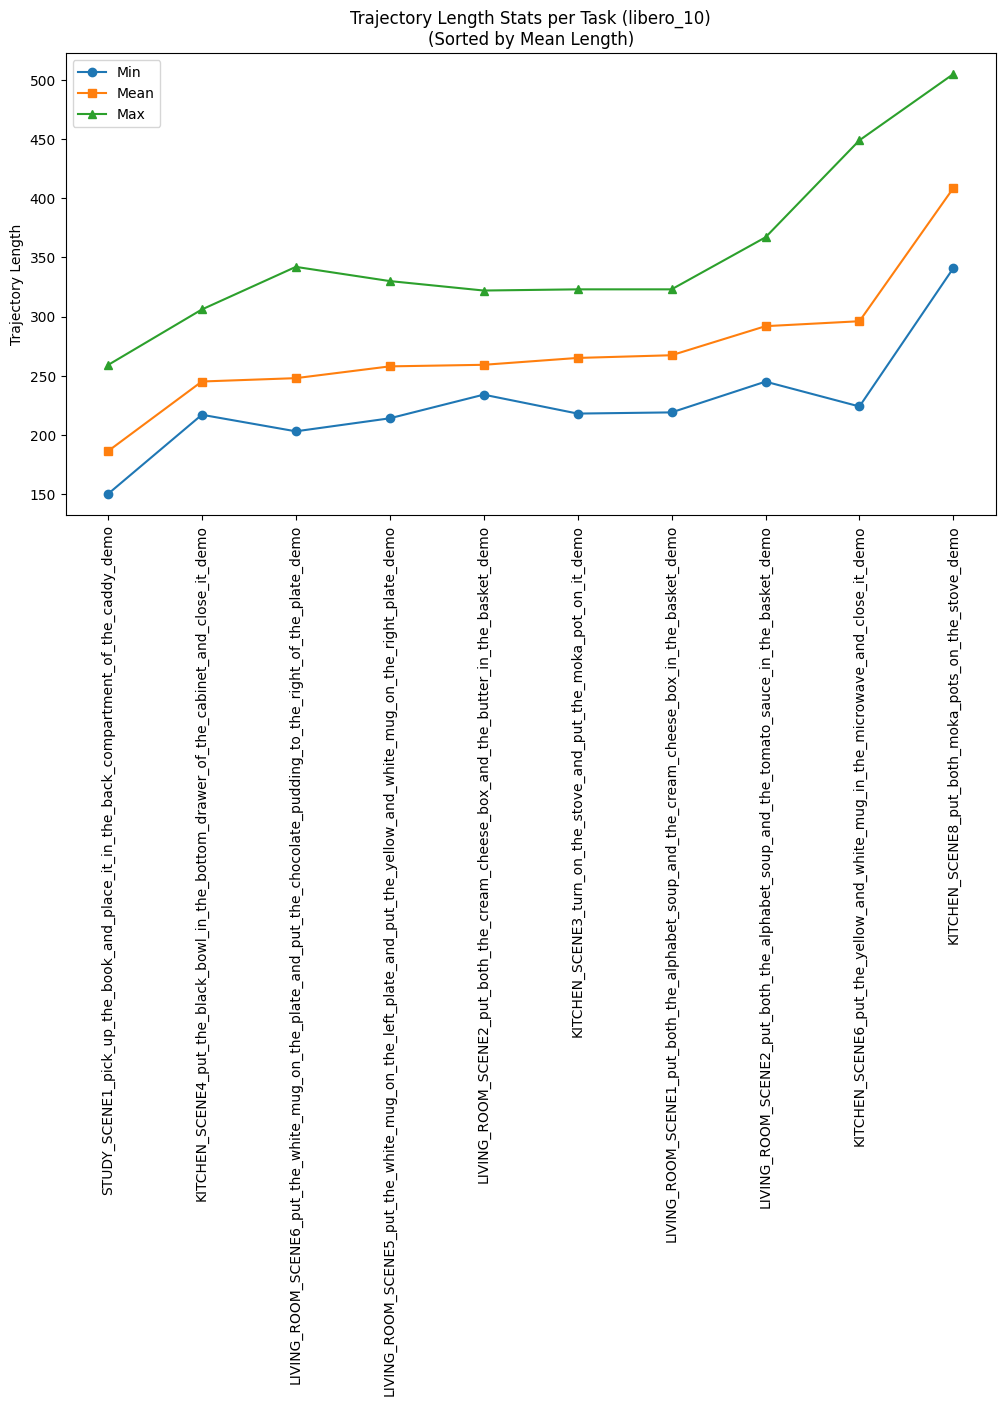

/tmp/ipykernel_835610/1476090469.py:62: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


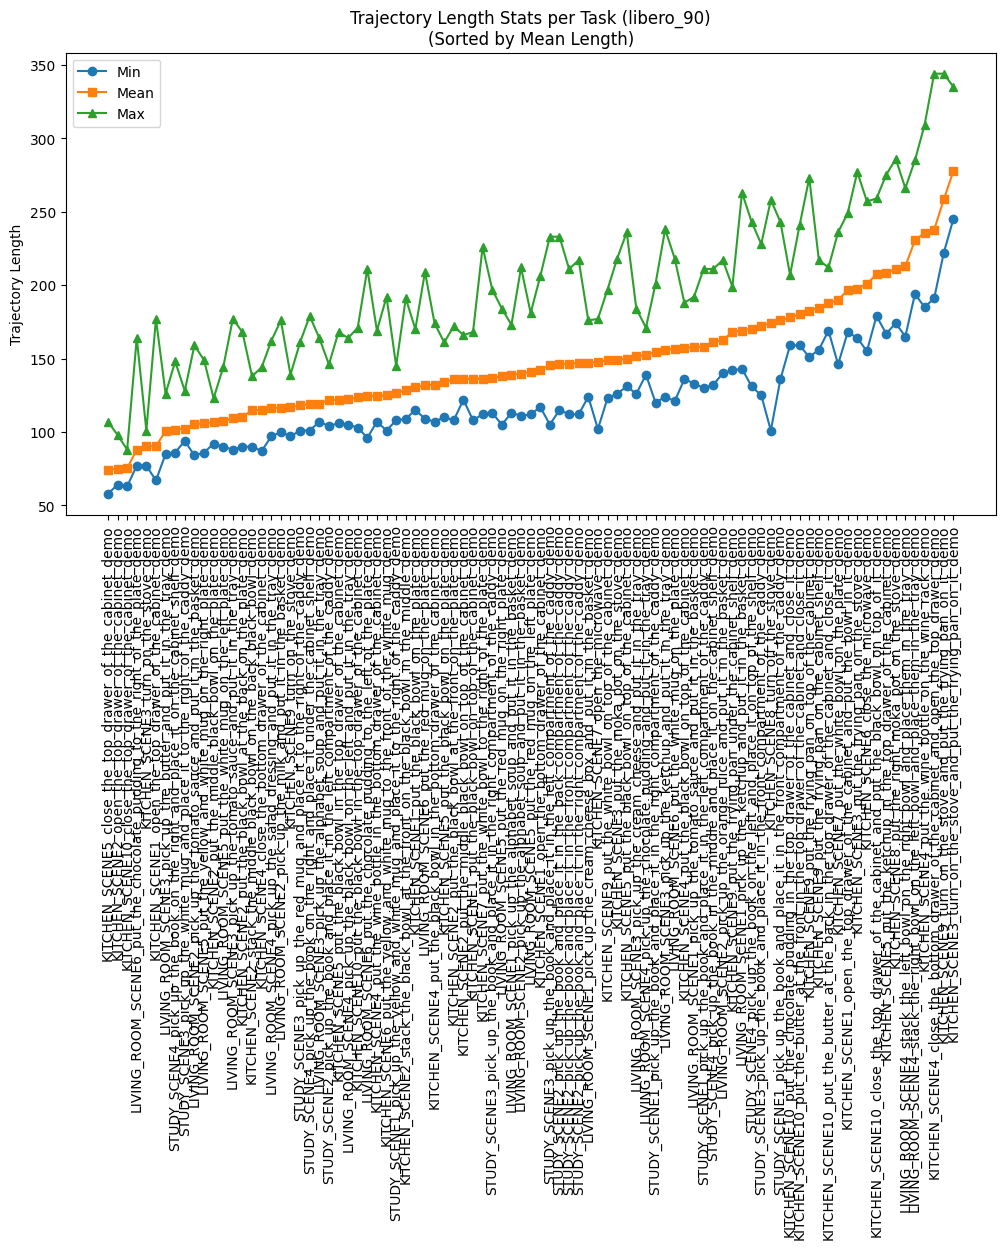

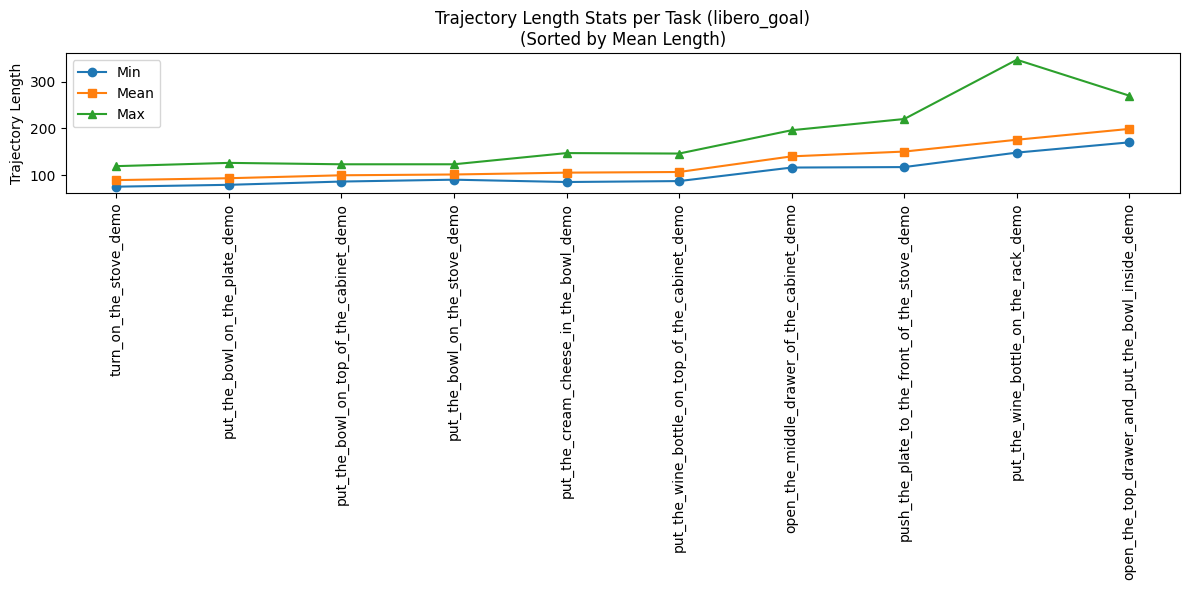

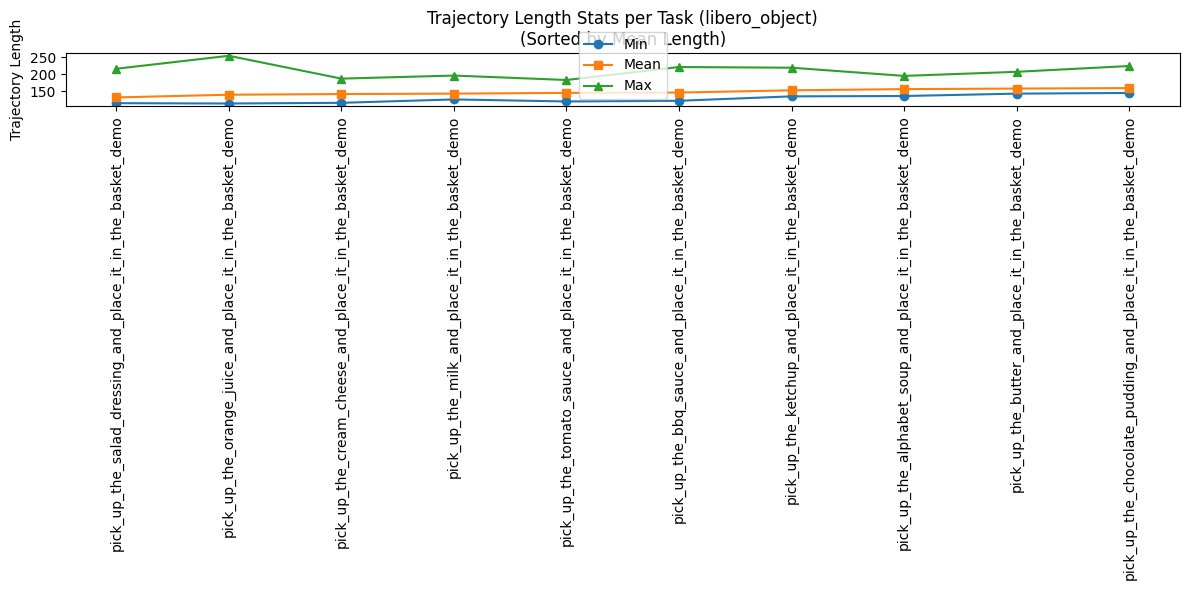

/tmp/ipykernel_835610/1476090469.py:62: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


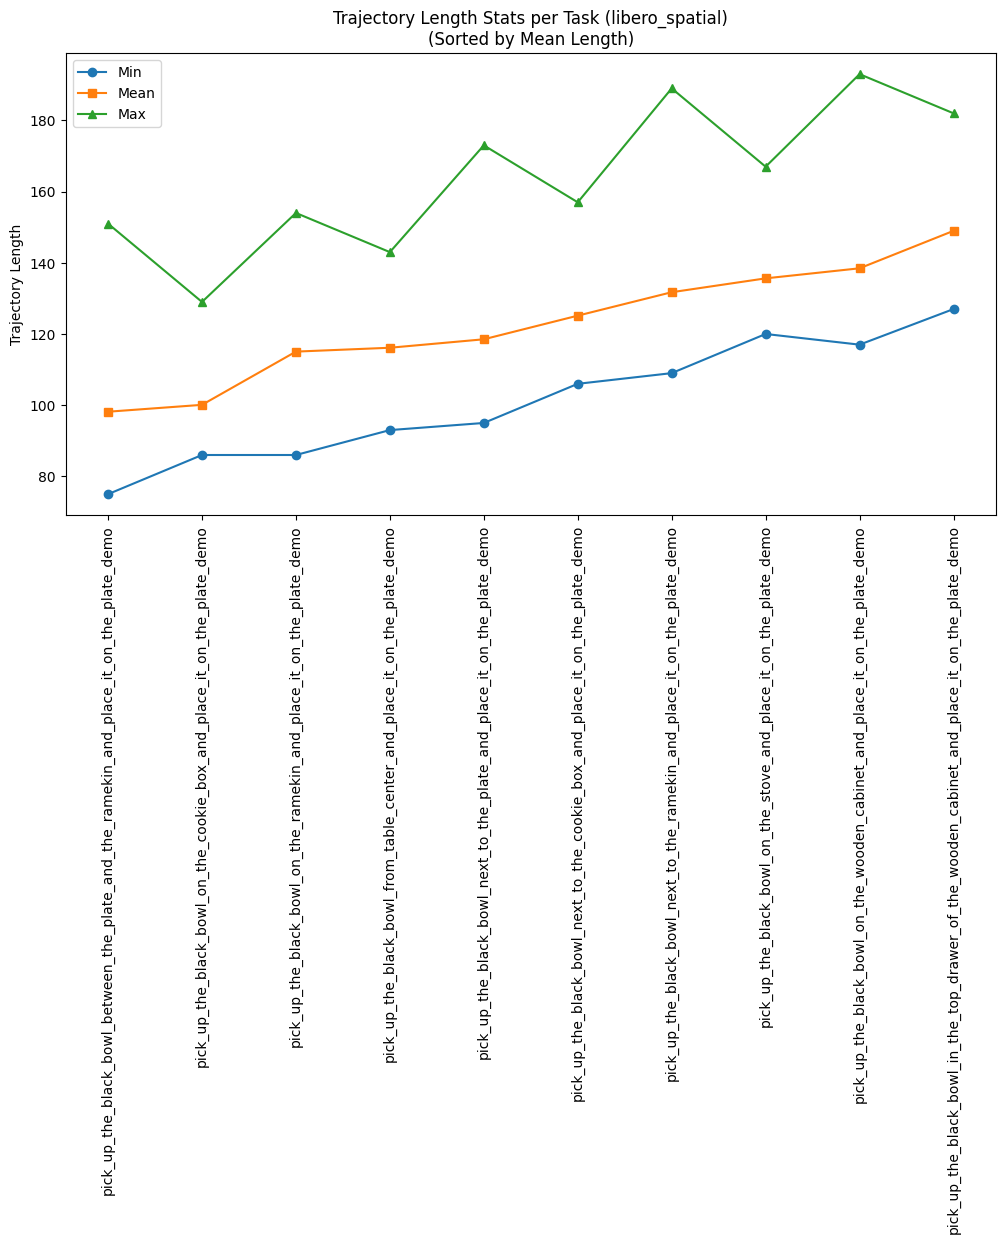

In [3]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

root = "/mnt/ssd0/data/libero"
task_types = ["libero_10", "libero_90", "libero_goal", "libero_object", "libero_spatial"]

results = {}

# ===== 统计部分 =====
for task_type in task_types:
    task_type_path = os.path.join(root, task_type)
    if not os.path.isdir(task_type_path):
        continue

    results[task_type] = {}
    for task_name in sorted(os.listdir(task_type_path)):
        task_path = os.path.join(task_type_path, task_name)
        if not os.path.isdir(task_path):
            continue

        lengths = []
        for fname in os.listdir(task_path):
            if not fname.endswith(".hdf5"):
                continue
            fpath = os.path.join(task_path, fname)
            try:
                with h5py.File(fpath, "r") as f:
                    if "action" in f:
                        lengths.append(f["action"].shape[0])
            except Exception as e:
                print(f"Error reading {fpath}: {e}")

        if lengths:
            min_len = int(np.min(lengths))
            max_len = int(np.max(lengths))
            mean_len = float(np.mean(lengths))
            results[task_type][task_name] = (min_len, max_len, mean_len)

# ===== 可视化部分 =====
for task_type, stats in results.items():
    # 排序：按 mean 长度从小到大
    sorted_stats = sorted(stats.items(), key=lambda x: x[1][2])  # x[1][2] = mean_len

    task_names = [t for t, _ in sorted_stats]
    mins = [vals[0] for _, vals in sorted_stats]
    maxs = [vals[1] for _, vals in sorted_stats]
    means = [vals[2] for _, vals in sorted_stats]

    x = np.arange(len(task_names))

    plt.figure(figsize=(12, 6))
    plt.plot(x, mins, marker="o", label="Min")
    plt.plot(x, means, marker="s", label="Mean")
    plt.plot(x, maxs, marker="^", label="Max")

    plt.xticks(x, task_names, rotation=90)
    plt.ylabel("Trajectory Length")
    plt.title(f"Trajectory Length Stats per Task ({task_type})\n(Sorted by Mean Length)")
    plt.legend()
    plt.tight_layout()
    plt.show()
